In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import ast
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df_RR = pd.DataFrame()
df_RA = pd.DataFrame()
df_LL = pd.DataFrame()

In [3]:
with open('log_LL.txt','r') as log:
  for line in log:
    if ('Algo' in str(line) or 'Format' in str(line)):
      pass
    else:
      line = ast.literal_eval(line)
      a = pd.Series(line)
      df_LL =df_LL.append(a,ignore_index=True)

with open('log_RR.txt','r') as log:
  for line in log:
    if ('Algo' in str(line) or 'Format' in str(line)):
      pass
    else:
      line = ast.literal_eval(line)
      b = pd.Series(line)
      df_RR =df_RR.append(b,ignore_index=True)

with open('log_RA.txt','r') as log:
  for line in log:
    if ('Algo' in str(line) or 'Format' in str(line)):
      pass
    else:
      line = ast.literal_eval(line)
      c = pd.Series(line)
      df_RA =df_RA.append(c,ignore_index=True)

df_LL.columns = ['code','time','jobid','mapreduce','worker']
df_RA.columns = ['code','time','jobid','mapreduce','worker']
df_RR.columns = ['code','time','jobid','mapreduce','worker']

In [4]:
def secs_between(d1, d2):
    d1 = datetime.strptime(d1, "%H:%M:%S")
    d2 = datetime.strptime(d2, "%H:%M:%S")
    return abs((d2 - d1).seconds)

def task_comp(df):
  taskComp = []
  df1 = pd.DataFrame(df.groupby(['jobid']).apply(lambda x: x.sort_values(by=['jobid'])))
  j = list(df1['jobid'].unique())
  for job in j:
    df2 = pd.DataFrame(df1[df1['jobid'] == str(job)])
    l_mr = list(df2['mapreduce'].unique())
    for mr in l_mr:
      if mr!= None:
        df3 = pd.DataFrame(df2[df2['mapreduce'] == str(mr)])
        sub = secs_between(df3['time'][0],df3['time'][1])
        taskComp.append(sub)
  return taskComp
      


In [5]:
def job_completion(df):
  jobComp = []
  df1 = pd.DataFrame(df.groupby(['jobid']).apply(lambda x: x.sort_values(by=['jobid'])))
  j = list(df1['jobid'].unique())
  for job in j:
    df2 = pd.DataFrame(df1[df1['jobid'] == str(job)])
    sub = secs_between(df2[df2.code == '10']['time'][0],df2[df2.code == '21']['time'][0])
    jobComp.append(sub)
  return jobComp


In [6]:
taskRR = task_comp(df_RR)
taskLL = task_comp(df_LL)
taskRA = task_comp(df_RA)
jobRR = job_completion(df_RR)
jobLL = job_completion(df_LL)
jobRA = job_completion(df_RA)

In [7]:
def find_stats(x,y):
  return (np.mean(x),np.median(x),np.mean(y),np.median(y))
TaskMeanRR,TaskMedianRR,JobMeanRR,JobMedianRR = find_stats(taskRR,jobRR)
TaskMeanLL,TaskMedianLL,JobMeanLL,JobMedianLL = find_stats(taskLL,jobLL)
TaskMeanRA,TaskMedianRA,JobMeanRA,JobMedianRA = find_stats(taskRA,jobRA)

In [8]:
print("\t\t\t","---"*12,"TaskCompletion Stats","---"*12)
print("\n\t\t-----------------------------Mean and Median for RoundRobin Algorithm are -> %.2f,%.2f-----------------------------" %(round(TaskMeanRR,2),round(TaskMedianRR,2)))
print("\n\t\t-----------------------------Mean and Median for LeastLoaded Algorithm are -> %.2f,%.2f-----------------------------" %(round(TaskMeanLL,2),round(TaskMedianLL,2)))
print("\n\t\t-----------------------------Mean and Median for RandomSelection Algorithm are -> %.2f,%.2f-----------------------------" %(round(TaskMeanRA,2),round(TaskMedianRA,2)))

			 ------------------------------------ TaskCompletion Stats ------------------------------------

		-----------------------------Mean and Median for RoundRobin Algorithm are -> 2.60,3.00-----------------------------

		-----------------------------Mean and Median for LeastLoaded Algorithm are -> 2.70,3.00-----------------------------

		-----------------------------Mean and Median for RandomSelection Algorithm are -> 2.38,2.00-----------------------------


In [9]:
print("\t\t\t","---"*12,"JobCompletion Stats","---"*12)
print("\n\t\t-----------------------------Mean and Median for RoundRobin Algorithm are -> %.2f,%.2f-----------------------------" %(round(JobMeanRR,2),round(JobMedianRR,2)))
print("\n\t\t-----------------------------Mean and Median for LeastLoaded Algorithm are -> %.2f,%.2f-----------------------------" %(round(JobMeanLL,2),round(JobMedianLL,2)))
print("\n\t\t-----------------------------Mean and Median for RandomSelection Algorithm are -> %.2f,%.2f-----------------------------" %(round(JobMeanRA,2),round(JobMedianRA,2)))

			 ------------------------------------ JobCompletion Stats ------------------------------------

		-----------------------------Mean and Median for RoundRobin Algorithm are -> 7.46,7.00-----------------------------

		-----------------------------Mean and Median for LeastLoaded Algorithm are -> 7.56,7.00-----------------------------

		-----------------------------Mean and Median for RandomSelection Algorithm are -> 5.82,6.00-----------------------------


In [10]:
def plot(x):
  w = list(x.worker.unique())
  tt = {}

  time = []
  for i in w:
    if i!=None:
      tt[i] = len(x[x.worker==str(i)].index)
    # mins = min(x[x.worker==str(i)]['time'])
      time.append(secs_between(min(x[x.worker==str(i)]['time']),max(x[x.worker==str(i)]['time'])))    
  return (tt,time)
  

In [11]:
plotRR_total,plotRR_time = plot(df_RR)
plotLL_total,plotLL_time = plot(df_LL)
plotRA_total,plotRA_time = plot(df_RA)

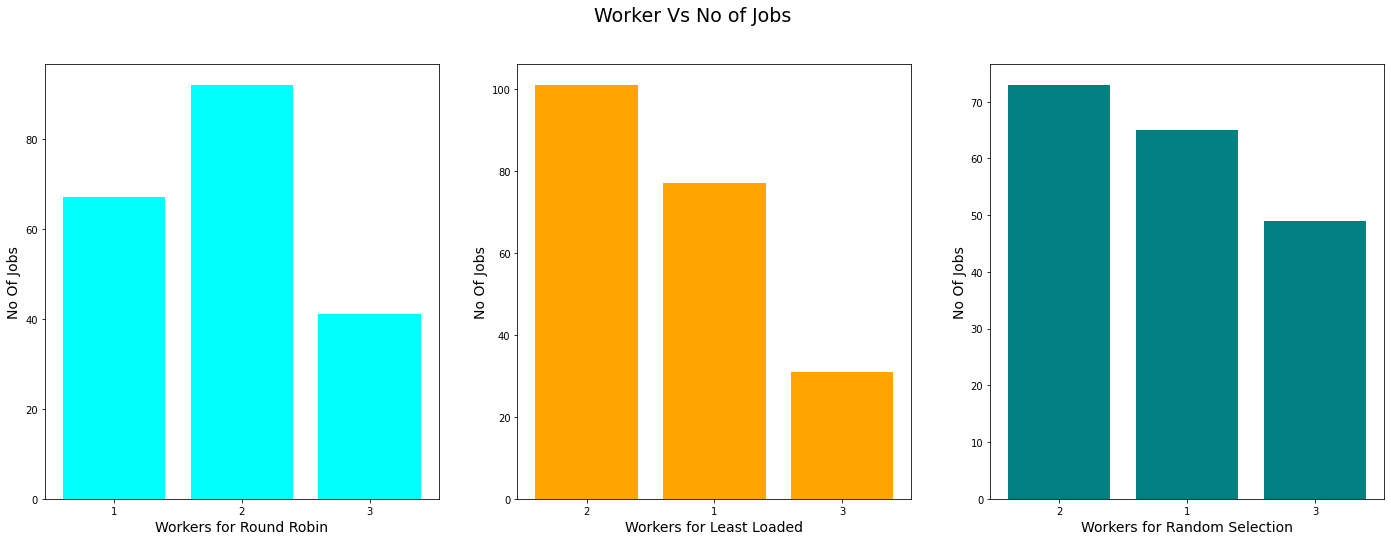

In [12]:
f,ax = plt.subplots(1,3)
f.set_size_inches(24,8)
ax[0].bar(plotRR_total.keys(),plotRR_total.values(),color='cyan');
ax[1].bar(plotLL_total.keys(),plotLL_total.values(),color='orange');
ax[2].bar(plotRA_total.keys(),plotRA_total.values(),color='teal');
f.suptitle("Worker Vs No of Jobs",size=19);
ax[0].set_xlabel("Workers for Round Robin",size=14);
ax[0].set_ylabel("No Of Jobs",size=14);
ax[1].set_xlabel("Workers for Least Loaded",size=14);
ax[1].set_ylabel("No Of Jobs",size=14);
ax[2].set_xlabel("Workers for Random Selection",size=14);
ax[2].set_ylabel("No Of Jobs",size=14);

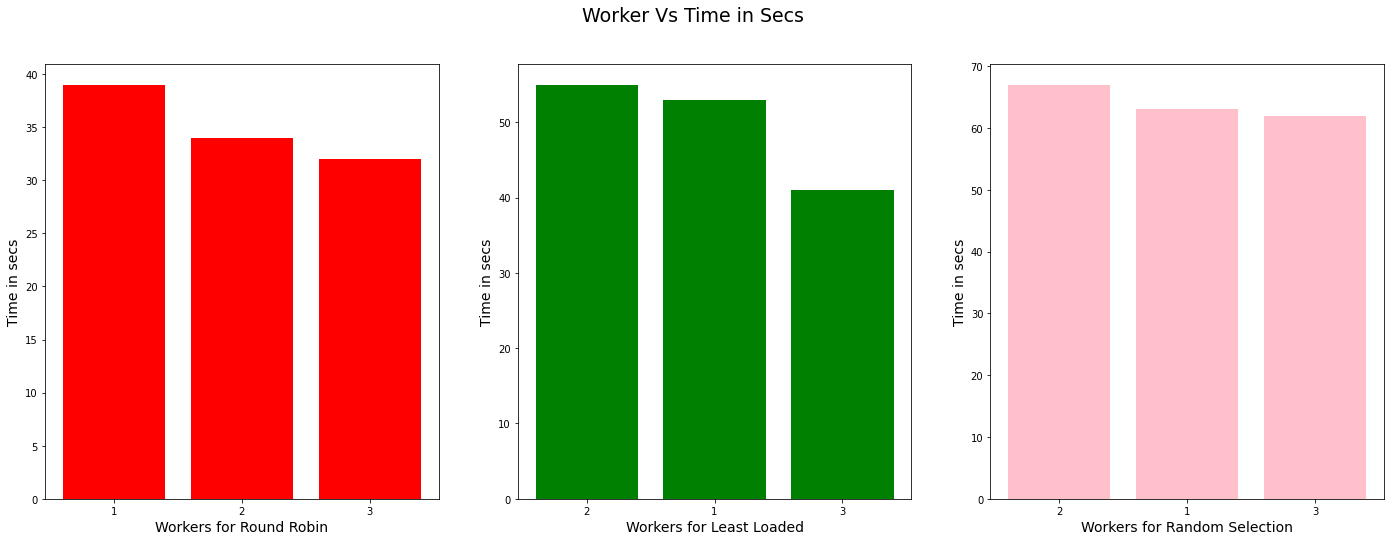

In [13]:
f,ax = plt.subplots(1,3)
f.set_size_inches(24,8)
ax[0].bar(plotRR_total.keys(),plotRR_time,color='red');
ax[1].bar(plotLL_total.keys(),plotLL_time,color='green');
ax[2].bar(plotRA_total.keys(),plotRA_time,color='pink');
f.suptitle("Worker Vs Time in Secs",size=19);
ax[0].set_xlabel("Workers for Round Robin",size=14);
ax[0].set_ylabel("Time in secs",size=14);
ax[1].set_xlabel("Workers for Least Loaded",size=14);
ax[1].set_ylabel("Time in secs",size=14);
ax[2].set_xlabel("Workers for Random Selection",size=14);
ax[2].set_ylabel("Time in secs",size=14);